In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


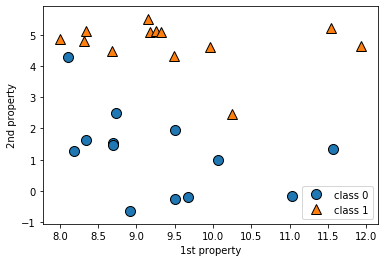

In [2]:
#데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
#산점도를 그립니다.
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("1st property")
plt.ylabel("2nd property")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'target')

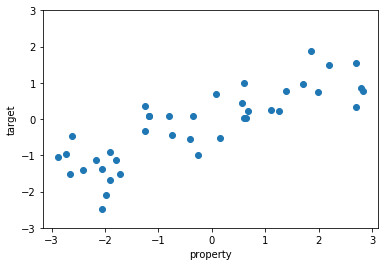

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("property")
plt.ylabel("target")

In [4]:
#위스콘신 유방암 데이터셋 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("유방암 데이터의 형태 {}".format(cancer.data.shape))

유방암 데이터의 형태 (569, 30)


In [6]:
print("클래스별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름 : \n{}".format(cancer.feature_names))

특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
#보스턴 주택가격 데이터셋
#정보 : 범죄율, 찰스강 인접도, 고속도로 접근성 등
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [9]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


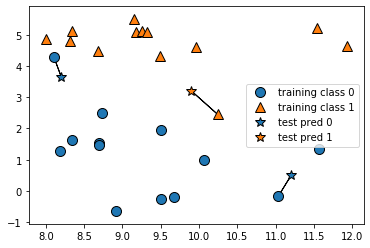

In [10]:
#k-최근접 이웃 (Knn알고리즘)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


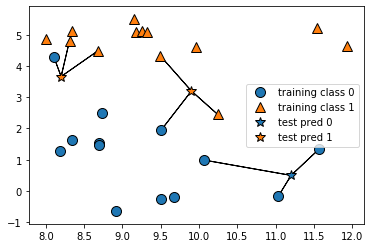

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


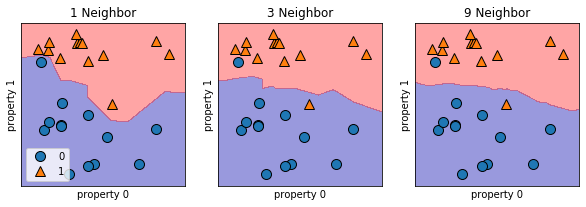

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    #fit 메서드는 self객체를 반환합니다.
    #그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있씁니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("property 0")
    ax.set_ylabel("property 1")
axes[0].legend(loc=3)    

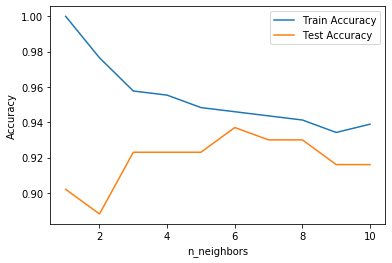

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#1에서 10까지 n_neighbors를 적성
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장 
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Train Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

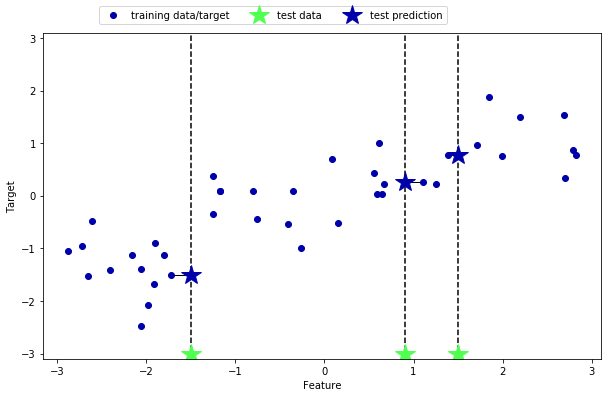

In [19]:
#k-최근접 이웃 회귀
mglearn.plots.plot_knn_regression(n_neighbors=1)

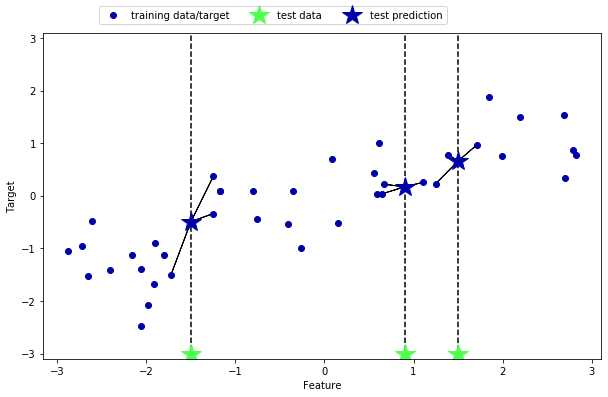

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습십니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2:0.83


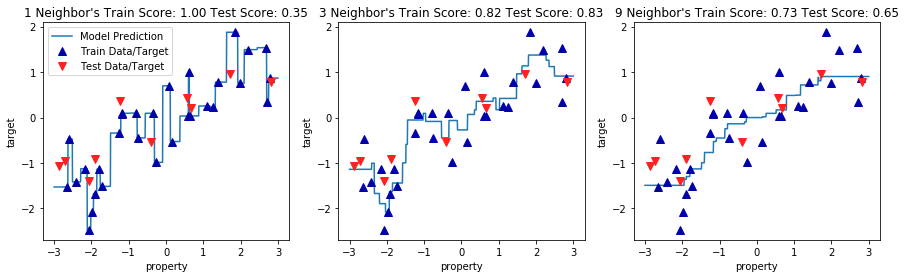

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
#-3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test,'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} Neighbor's Train Score: {:.2f} Test Score: {:.2f}".format(
    n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)) 
    )
    ax.set_xlabel("property")
    ax.set_ylabel("target")
axes[0].legend(["Model Prediction","Train Data/Target","Test Data/Target"],loc="best")    